In [1]:
def draw_step(path, model_num, crr):
    import csv 
    import matplotlib.pyplot as plt 

    color_table = ['orange','black','blue','red','teal','darkred','slateblue','forestgreen','skyblue','hotpink']
    path_list = []
    f = []
    data = []
    for item in model_num:
        path_list.append(path + " (" + str(item) + ").csv")
        f.append('')
        data.append('')
        
    for i in range(len(model_num)):
        f[i] = open(path_list[i], 'r', encoding = 'cp949')
        data[i] = csv.reader(f[i], delimiter = ',')
        header = next(data[i])

    step = []
    value = []
    
    for csv in data:
        step_buf = []
        value_buf = []
        for row in csv:
            step_buf.append( int( int(row[0].replace(',','')) / 1000) )
            value_buf.append( float(row[2].replace(',','')) )
        step.append(step_buf)
        value.append(value_buf)

    y_label = str()
    if 'loss' in path:
        title = 'step_loss'
        y_label = 'loss'
    else:
        title = 'step_cer'
        y_label = 'cer'
    
    plt.suptitle(title,fontsize=20, x = 0.23)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.xlabel('step (unit : 1k)', fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    for i in range(len(model_num)):
        plt.plot(step[i], value[i], 
                 label = 'Kai #' + str(model_num[i]) + ' (' + str(crr[i]) + '%)',
                 color = color_table[len(color_table) - len(model_num) + i])
    plt.legend()
    plt.grid(True)
    plt.savefig(path + '.png')
    plt.show()
    for i in range(len(model_num)):
        f[i].close()

In [3]:
def draw_epoch(path, model_num, crr):
    import csv
    import matplotlib.pyplot as plt
    color_table = ['orange','black','blue','red','teal','darkred','slateblue','forestgreen','skyblue','hotpink']
    path_list = []
    f = []
    data = []
    
    if len(model_num) != len(crr):
        print("model_num != crr")
    
    for item in model_num:
        path_list.append(path + " (" + str(item) + ").csv")
        f.append('')
        data.append('')
        
    for i in range(len(model_num)):
        f[i] = open(path_list[i], 'r', encoding = 'cp949')
        data[i] = csv.reader(f[i], delimiter = ',')
        header = next(data[i])

    step = []
    value = []
    
    for csv in data:
        step_buf = []
        value_buf = []
        for row in csv:
            step_buf.append( int( int(row[0].replace(',',''))) )
            value_buf.append( float(row[2].replace(',','')) )
        step.append(step_buf)
        value.append(value_buf)

    y_label = str()
    if 'eval' in path :
        if 'loss' in path:
            title = 'eval_loss'
            y_label = 'loss'
        else:
            title = 'eval_cer'
            y_label = 'cer'
    else:
        if 'loss' in path:
            title = 'tain_epoch_loss'
            y_label = 'loss'
        else:
            title = 'train_epoch_cer'
            y_label = 'cer'
    
    plt.suptitle(title,fontsize=20, x = 0.23)
    plt.tight_layout()

    plt.subplots_adjust(top=0.88)
    plt.xlabel('epoch', fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    for i in range(len(model_num)):
        plt.plot(step[i], value[i], 
                 label = 'Kai #' + str(model_num[i]) + ' (' + str(crr[i]) + '%)',
                 color = color_table[len(color_table) - len(model_num) + i])
    plt.legend()
    plt.grid(True)
    plt.savefig(path + '.png')
    plt.show()
    for i in range(len(model_num)):
        f[i].close()

In [4]:
draw_epoch('scalar_eval_loss', [20,22,26], [66.8,70.5, 73,4])

model_num != crr


<Figure size 640x480 with 0 Axes>

<Figure size 2000x400 with 1 Axes>

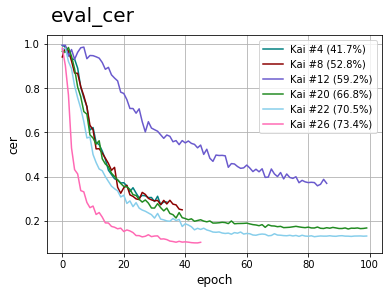

In [55]:
draw_epoch('scalar_eval_cer', [4,8,12,20,22,26], [41.7,52.8,59.2,66.8,70.5,73.4])